# Rozwiązanie problemu plecakowego wykorzystując algorytm genetyczny

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

### 1. Wygenerowanie danych plecaka

In [72]:
def generate_knapsack_data(weight_range, value_range, num_items):
    item_list = []
    for _ in range(num_items):
        weight = np.random.randint(weight_range[0], weight_range[1])
        value = np.random.randint(value_range[0], value_range[1])
        item_list.append((weight, value))    
    item_list = list(enumerate(item_list,1))
    return item_list

In [73]:
item_list = generate_knapsack_data((1,10), (1,20), 10)
item_list

[(1, (8, 5)),
 (2, (6, 5)),
 (3, (7, 3)),
 (4, (3, 6)),
 (5, (9, 2)),
 (6, (1, 13)),
 (7, (8, 18)),
 (8, (6, 16)),
 (9, (3, 4)),
 (10, (5, 3))]

### 2. Inicjowanie populacji

In [75]:
def generate_population(pop_rows, num_items):
    population = [np.random.randint(0, 2, num_items).tolist() for _ in range(pop_rows)]
    population = np.array(population)
    return population

In [76]:
population = generate_population(10, 10)
population

array([[1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 1]])

### 3. Funkcja dopasowania 

In [147]:
def fitness_vec(item_list, population, threshold):
    value_fitness = np.empty(len(population))
    weight_fitness = np.empty(len(population))
    weight_list = [element[1][0] for element in item_list]
    value_list = [element[1][1] for element in item_list]
    for i in range(len(population)):
        weight_sum = np.sum(population[i] * weight_list)
        value_sum = np.sum(population[i] * value_list)
        if weight_sum <= threshold:
            value_fitness[i] = value_sum
            weight_fitness[i] = weight_sum
        else:
            value_fitness[i] = 0 
            weight_fitness[i] = 0
            
    #print(f'Weights list: {weight_list}')
    #print(f'Values list: {value_list}')
    #print(population)
    #print(f'Value fitness: {value_fitness}')
    #print(f'Weight fitness: {weight_fitness}')
    
    return value_fitness.astype(int), weight_fitness.astype(int)

In [78]:
fitness = fitness_vec(item_list, population, 35)
fitness

Weights list: [8, 6, 7, 3, 9, 1, 8, 6, 3, 5]
Values list: [5, 5, 3, 6, 2, 13, 18, 16, 4, 3]
[[1 0 0 1 1 1 0 0 0 0]
 [1 1 0 1 1 0 1 1 1 1]
 [0 1 1 0 1 1 0 1 1 0]
 [1 1 1 1 1 1 0 1 0 1]
 [1 0 0 1 1 1 0 1 0 1]
 [0 1 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 1 1 0 0]
 [0 0 1 1 0 0 0 1 0 0]
 [1 0 0 1 1 0 0 1 0 1]
 [1 1 0 0 1 0 0 0 0 1]]
Value fitness: [26.  0. 43.  0. 45. 26. 44. 25. 32. 15.]
Weight fitness: [21.  0. 32.  0. 32. 19. 28. 16. 31. 28.]


(array([26,  0, 43,  0, 45, 26, 44, 25, 32, 15]),
 array([21,  0, 32,  0, 32, 19, 28, 16, 31, 28]))

### 4. Selekcja rodziców

In [148]:
def selection(fitness, population):
    
    candidates = []
    parents = []
    
    for i in range(len(population)):
        pop_fit = [population[i], fitness[0][i]]
        candidates.append(pop_fit)
        
    #print('before sorting:')
    #print(np.array(candidates,dtype=object))
    
    random.shuffle(candidates)
    
    if candidates[0][1] > candidates[1][1]:
        parents.append(candidates[0][0])
    else:
        parents.append(candidates[1][0])
    
    if candidates[2][1] > candidates[3][1]:
        parents.append(candidates[2][0])
    else:
        parents.append(candidates[3][0])
        
    #print('after sorting:')
    #print(np.array(candidates,dtype=object))
    #print('Tournament 1:')
    #print(f'Candidate 1: {candidates[0][0]} | Value:{candidates[0][1]}')
    #print(f'Candidate 2: {candidates[1][0]} | Value:{candidates[1][1]}')
    #print('Tournament 2:')
    #print(f'Candidate 3: {candidates[2][0]} | Value:{candidates[2][1]}')
    #print(f'Candidate 4: {candidates[3][0]} | Value:{candidates[3][1]}')
    #print('Parents:')

    return parents

In [80]:
parents = selection(fitness, population)
parents

before sorting:
[[array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0]) 26]
 [array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1]) 0]
 [array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0]) 43]
 [array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1]) 0]
 [array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1]) 45]
 [array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1]) 26]
 [array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0]) 44]
 [array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0]) 25]
 [array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1]) 32]
 [array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1]) 15]]
after sorting:
[[array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1]) 0]
 [array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1]) 32]
 [array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1]) 0]
 [array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0]) 25]
 [array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0]) 43]
 [array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0]) 44]
 [array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1]) 15]
 [array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0]) 26]
 [array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1]) 26]
 [array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1]) 45]]
Tournament 1:
Candidate 1: [1 1 1 1 1 1 0 1 0 1] | Value:0
Candidate 2: [1 0 0 1 1 0 0 1 0 

[array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1]), array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])]

### 5. Krzyżowanie

In [149]:
def crossover(parents,num_items):
    
    parent1 = parents[0].astype(int)
    parent2 = parents[1].astype(int)
    
    crossover_point = random.randint(0, num_items-1)
    
    #print(f'crossover_point: {crossover_point}')
    #print(f'parent1: {parent1}')
    #print(f'parent2: {parent2}')
    #print(f'parent1_crossover_point: {parent1[0:crossover_point]}')
    #print(f' {parent1[crossover_point:]}')
    #print(f'parent2_crossover_point: {parent2[0:crossover_point]}')
    #print(f' {parent2[crossover_point:]}')
    
    child1 = np.concatenate((parent1[0:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[0:crossover_point], parent1[crossover_point:]))
    
    #print("Otrzymane dzieci po operacji krzyzowania")
    #print(f'child1: {child1}')
    #print(f'child2: {child2}')
    
    return child1, child2

In [141]:
children = crossover(parents,10)
children

crossover_point: 6
parent1: [1 0 0 1 1 0 0 1 0 1]
parent2: [0 0 1 1 0 0 0 1 0 0]
parent1_crossover_point: [1 0 0 1 1 0]
 [0 1 0 1]
parent2_crossover_point: [0 0 1 1 0 0]
 [0 1 0 0]
Otrzymane dzieci po operacji krzyzowania
child1: [1 0 0 1 1 0 0 1 0 0]
child2: [0 0 1 1 0 0 0 1 0 1]


(array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0]), array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1]))

# 6. Mutacja

In [112]:
def mutation(children,mutation_rate):
    mutants = []
    for child in children:
        for i in range(len(child)):
            if random.random() < mutation_rate:
                if child[i] == 0:
                    child[i] = 1
                else:
                    child[i] = 0
            else:
                pass
        mutants.append(child)
    return mutants

In [143]:
mutated_children = mutation(children,0.05)
mutated_children

[array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0]), array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1])]

### 7. Reprodukcja

In [150]:
def reproduction(population, max_generations):
    
    
    fitness_scores = fitness_vec(item_list, population, threshold)
    initial_fitness = fitness_scores
    print('----------INITIAL POPULATION---------')
    print(population)
    print('**********INITIAL FITNESS************')
    print(f'values: {initial_fitness[0]} \nweights: {initial_fitness[1]}')
    for generation in range(max_generations):
        
        parents = selection(fitness_scores, population)
        children = crossover(parents,num_items)
        mutated_children = np.array(mutation(children,mutation_rate))
        
        updated_population = np.concatenate((population, mutated_children))
        fitness_scores = fitness_vec(item_list, updated_population, threshold)

        lowest_indices = np.argsort(fitness_scores[0])[:2]
        population = np.delete(updated_population, lowest_indices, axis=0)

            
    fitness_scores_final = fitness_vec(item_list, population, threshold)
    print('------------FINAL POPULATION---------------')
    print(population)
    print('**********FINAL FITNESS************')
    print(f'values: {fitness_scores_final[0]} \nweights: {fitness_scores_final[1]}')

In [152]:
reproduction(population, 100)

----------INITIAL POPULATION---------
[[1 0 0 1 1 1 0 0 0 0]
 [1 1 0 1 1 0 1 1 1 1]
 [0 1 1 0 1 1 0 1 1 0]
 [1 1 1 1 1 1 0 1 0 1]
 [1 0 0 1 1 1 0 1 0 1]
 [0 1 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 1 1 0 0]
 [0 0 1 1 0 0 0 1 0 0]
 [1 0 0 1 1 0 0 1 0 1]
 [1 1 0 0 1 0 0 0 0 1]]
**********INITIAL FITNESS************
values: [26  0 43  0 45 26 44 25 32 15] 
weights: [21  0 32  0 32 19 28 16 31 28]
------------FINAL POPULATION---------------
[[1 1 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 1 1 1 1 0]]
**********FINAL FITNESS************
values: [67 67 67 67 67 67 67 67 67 67] 
weights: [35 35 35 35 35 35 35 35 35 35]


### 8. Finalny solver

In [214]:
def genetic_algorithm(weight_range, value_range, num_items, pop_rows, threshold, mutation_rate, max_generations):
    
    def generate_knapsack_data(weight_range, value_range, num_items):
        item_list = []
        for _ in range(num_items):
            weight = np.random.randint(weight_range[0], weight_range[1])
            value = np.random.randint(value_range[0], value_range[1])
            item_list.append((weight, value))    
        item_list = list(enumerate(item_list,1))
        return item_list
    
    item_list = generate_knapsack_data(weight_range, value_range, num_items)

    def generate_population(pop_rows, num_items):
        population = [np.random.randint(0, 2, num_items).tolist() for _ in range(pop_rows)]
        population = np.array(population)
        return population

    population = generate_population(pop_rows, num_items)
    
    def fitness_vec(item_list, population, threshold):
        fitness = np.empty(len(population))
        weightness = np.empty(len(population))
        weight_list = [element[1][0] for element in item_list]
        value_list = [element[1][1] for element in item_list]
        for i in range(len(population)):
            weight_sum = np.sum(population[i] * weight_list)
            value_sum = np.sum(population[i] * value_list)
            if weight_sum <= threshold:
                fitness[i] = value_sum
                weightness[i] = weight_sum
            else:
                fitness[i] = 0 
                weightness[i] = 0
        return fitness.astype(int), weightness.astype(int)
    
    fitness = fitness_vec(item_list, population, threshold)

    def selection(fitness, population):
        candidates = []
        parents = []
        for i in range(len(population)):
            pop_fit = [population[i], fitness[0][i]]
            candidates.append(pop_fit)
        random.shuffle(candidates)
        
        if candidates[0][1] > candidates[1][1]:
            parents.append(candidates[0][0])
        else:
            parents.append(candidates[1][0])
        
        if candidates[2][1] > candidates[3][1]:
            parents.append(candidates[2][0])
        else:
            parents.append(candidates[3][0])
    
        return parents
    
    parents = selection(fitness, population)

    def crossover(parents, num_items):
        parent1 = parents[0].astype(int)
        parent2 = parents[1].astype(int)
        crossover_point = random.randint(0, num_items-1)
        
        child1 = np.concatenate((parent1[0:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[0:crossover_point], parent1[crossover_point:]))
        
        return child1, child2

    children = crossover(parents, num_items)
    
    def mutation(children,mutation_rate):
        mutants = []
        for child in children:
            for i in range(len(child)):
                if random.random() < mutation_rate:
                    if child[i] == 0:
                        child[i] = 1
                    else:
                        child[i] = 0
                else:
                    pass
            mutants.append(child)
        return mutants
    
    mmutated_children = mutation(children,mutation_rate)
    
    def reproduction(population, max_generations):
    
        history_best_solutions = []
        selected_items = []
        best_value = 0
        
        fitness_scores = fitness_vec(item_list, population, threshold)
        initial_fitness = fitness_scores
        print('<<<<<<<<<<ITEMS LIST>>>>>>>>>>>\n')
        print(f'{item_list}\n')
        print('----------INITIAL POPULATION---------\n')
        print(f'{population}\n')
        print('**********INITIAL FITNESS************\n')
        print(f'values: {initial_fitness[0]}\nweights: {initial_fitness[1]}\n')
        for generation in range(max_generations):
            
            parents = selection(fitness_scores, population)
            children = crossover(parents,num_items)
            mutated_children = np.array(mutation(children,mutation_rate))
            
            updated_population = np.concatenate((population, mutated_children))
            fitness_scores = fitness_vec(item_list, updated_population, threshold)
    
            lowest_indices = np.argsort(fitness_scores[0])[:2]
            population = np.delete(updated_population, lowest_indices, axis=0)
            
            if np.max(fitness_scores[0]) > best_value:
                best_value = np.max(fitness_scores[0])
                history_best_solutions.append(best_value)
                
        fitness_scores_final = fitness_vec(item_list, population, threshold)
        best_solution = population[np.argmax(fitness_scores_final)]
        
        if np.max(fitness_scores_final) != 0:
            for item in zip(item_list, best_solution):
                if item[1] == 1:
                    selected_items.append(item[0][0])
        else:
            best_solution = 'None'
            selected_items = 'None'
                
        print('------------FINAL POPULATION---------------\n')
        print(f'{population}\n')
        print('**********FINAL FITNESS************\n')
        print(f'values: {fitness_scores_final[0]}\nweights: {fitness_scores_final[1]}\n')
        print(f'BEST SOLUTION\n')
        print(f'{best_solution}\n')
        print('SELECTED ITEMS NUMBERS\n')
        print(f'{selected_items}\n')
        
        function_improvements = np.arange(len(history_best_solutions))
        
        plt.plot(function_improvements, history_best_solutions)
        plt.xlabel('Number of function improvement')
        plt.ylabel('Fitness Value')
        plt.title('Fitness Progression')
        plt.show()
    
    reproduction(population, max_generations)
    

<<<<<<<<<<ITEMS LIST>>>>>>>>>>>

[(1, (74, 13)), (2, (52, 23)), (3, (19, 130)), (4, (44, 157)), (5, (37, 36)), (6, (81, 164)), (7, (18, 128)), (8, (79, 132)), (9, (2, 177)), (10, (68, 85)), (11, (53, 167)), (12, (52, 161)), (13, (19, 119)), (14, (53, 27)), (15, (78, 174)), (16, (32, 73)), (17, (12, 8)), (18, (36, 104)), (19, (51, 112)), (20, (53, 91))]

----------INITIAL POPULATION---------

[[1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1]
 [0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1]
 [1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0]
 [1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0]
 [1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0]
 [0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0]
 [0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0]]

**********INITIAL FITNESS************

values: [   0  705  872  882    0    0    0  726 1053  691]
weights: [  0 277 467 480   0   0   0 291 348 241]

------------FINAL POPU

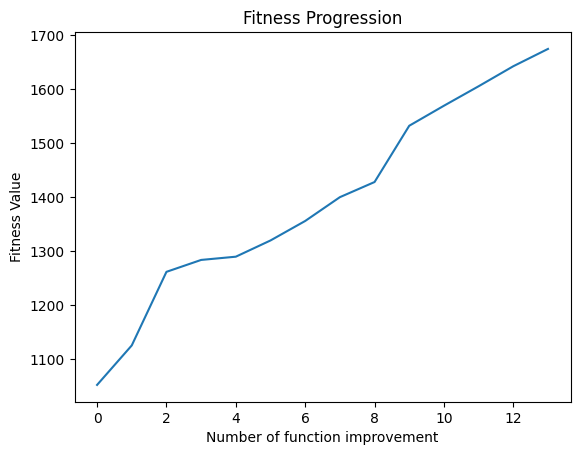

In [216]:
genetic_algorithm((1,100), (1,200), 20, 10, 500, 0.05, 10000)

<<<<<<<<<<ITEMS LIST>>>>>>>>>>>

[(1, (5, 46)), (2, (95, 185)), (3, (87, 70)), (4, (66, 107)), (5, (92, 189)), (6, (12, 54)), (7, (92, 70)), (8, (52, 9)), (9, (96, 76)), (10, (59, 1)), (11, (68, 21)), (12, (45, 153)), (13, (64, 26)), (14, (50, 196)), (15, (97, 109)), (16, (22, 102)), (17, (90, 195)), (18, (4, 73)), (19, (3, 123)), (20, (37, 124)), (21, (89, 178)), (22, (64, 178)), (23, (12, 135)), (24, (79, 5)), (25, (11, 186)), (26, (68, 157)), (27, (36, 55)), (28, (61, 46)), (29, (81, 135)), (30, (93, 14)), (31, (57, 16)), (32, (62, 100)), (33, (3, 156)), (34, (72, 171)), (35, (18, 66)), (36, (66, 12)), (37, (48, 62)), (38, (94, 173)), (39, (98, 196)), (40, (84, 154)), (41, (74, 185)), (42, (37, 144)), (43, (30, 8)), (44, (18, 32)), (45, (81, 69)), (46, (98, 57)), (47, (69, 146)), (48, (97, 93)), (49, (39, 95)), (50, (63, 126)), (51, (90, 84)), (52, (5, 169)), (53, (66, 106)), (54, (68, 149)), (55, (82, 77)), (56, (77, 106)), (57, (21, 96)), (58, (51, 161)), (59, (92, 137)), (60, (75

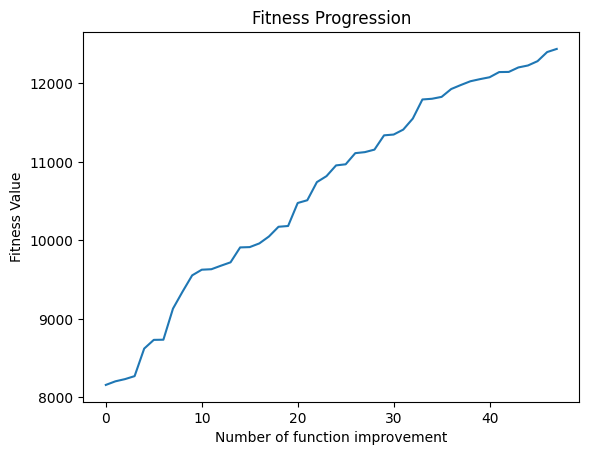

In [219]:
genetic_algorithm((1,100), (1,200), 200, 10, 3000, 0.05, 100000)